In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=02e529b5a9abff1614d1f516b3857f71


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1 
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mogadishu
Processing Record 2 of Set 1 | husavik
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 1 | constitucion
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | ternate
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | grand river south east
City not found. S

Processing Record 32 of Set 4 | kearney
Processing Record 33 of Set 4 | abu dhabi
Processing Record 34 of Set 4 | paita
Processing Record 35 of Set 4 | nhulunbuy
Processing Record 36 of Set 4 | ulaanbaatar
Processing Record 37 of Set 4 | ostrovnoy
Processing Record 38 of Set 4 | rawson
Processing Record 39 of Set 4 | kysyl-syr
Processing Record 40 of Set 4 | castro
Processing Record 41 of Set 4 | mandalgovi
Processing Record 42 of Set 4 | broome
Processing Record 43 of Set 4 | weymouth
Processing Record 44 of Set 4 | sakmara
Processing Record 45 of Set 4 | boa vista
Processing Record 46 of Set 4 | plymouth
Processing Record 47 of Set 4 | along
Processing Record 48 of Set 4 | lawrenceburg
Processing Record 49 of Set 4 | avarua
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | guerrero negro
Processing Record 2 of Set 5 | cururupu
Processing Record 3 of Set 5 | norman wells
Processing Record 4 of Set 5 | port blair
Processing Record 5 of Set 5 | bedele
Processing Reco

Processing Record 24 of Set 8 | xuddur
Processing Record 25 of Set 8 | marzuq
Processing Record 26 of Set 8 | urucara
Processing Record 27 of Set 8 | mount isa
Processing Record 28 of Set 8 | tamiahua
Processing Record 29 of Set 8 | contamana
Processing Record 30 of Set 8 | nicoya
Processing Record 31 of Set 8 | huaihua
Processing Record 32 of Set 8 | poum
Processing Record 33 of Set 8 | henties bay
Processing Record 34 of Set 8 | raga
Processing Record 35 of Set 8 | yaan
Processing Record 36 of Set 8 | oxford
Processing Record 37 of Set 8 | obo
Processing Record 38 of Set 8 | tual
Processing Record 39 of Set 8 | thompson
Processing Record 40 of Set 8 | mount pleasant
Processing Record 41 of Set 8 | bureya
Processing Record 42 of Set 8 | karasuk
Processing Record 43 of Set 8 | biltine
Processing Record 44 of Set 8 | marawi
Processing Record 45 of Set 8 | quatre cocos
Processing Record 46 of Set 8 | luderitz
Processing Record 47 of Set 8 | port lincoln
Processing Record 48 of Set 8 | bo

Processing Record 14 of Set 12 | logan lake
Processing Record 15 of Set 12 | vestmanna
Processing Record 16 of Set 12 | canmore
Processing Record 17 of Set 12 | tateyama
Processing Record 18 of Set 12 | polikhnitos
City not found. Skipping...
Processing Record 19 of Set 12 | basco
Processing Record 20 of Set 12 | paz de ariporo
City not found. Skipping...
Processing Record 21 of Set 12 | nampula
Processing Record 22 of Set 12 | krasnofarfornyy
Processing Record 23 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 24 of Set 12 | barbar
City not found. Skipping...
Processing Record 25 of Set 12 | mocuba
Processing Record 26 of Set 12 | mudyuga
City not found. Skipping...
Processing Record 27 of Set 12 | puerto padre
Processing Record 28 of Set 12 | manavgat
Processing Record 29 of Set 12 | henderson
Processing Record 30 of Set 12 | bargal
City not found. Skipping...
Processing Record 31 of Set 12 | guane
Processing Record 32 of Set 12 | didao
Processing Record 33 of S

In [64]:
city_data[10:]

[{'City': 'Punta Arenas',
  'Lat': -53.15,
  'Lng': -70.92,
  'Max Temp': 46.4,
  'Humidity': 75,
  'Cloudiness': 40,
  'Wind Speed': 23.04,
  'Country': 'CL',
  'Date': '2020-04-18 05:18:26'},
 {'City': 'New Norfolk',
  'Lat': -42.78,
  'Lng': 147.06,
  'Max Temp': 57,
  'Humidity': 77,
  'Cloudiness': 89,
  'Wind Speed': 1.99,
  'Country': 'AU',
  'Date': '2020-04-18 05:18:20'},
 {'City': 'Puerto Ayora',
  'Lat': -0.74,
  'Lng': -90.35,
  'Max Temp': 75.99,
  'Humidity': 91,
  'Cloudiness': 73,
  'Wind Speed': 1.99,
  'Country': 'EC',
  'Date': '2020-04-18 05:18:21'},
 {'City': 'Kapaa',
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 78.8,
  'Humidity': 69,
  'Cloudiness': 1,
  'Wind Speed': 10.29,
  'Country': 'US',
  'Date': '2020-04-18 05:18:23'},
 {'City': 'Mar Del Plata',
  'Lat': -38,
  'Lng': -57.56,
  'Max Temp': 60.01,
  'Humidity': 93,
  'Cloudiness': 0,
  'Wind Speed': 9.17,
  'Country': 'AR',
  'Date': '2020-04-18 05:14:20'},
 {'City': 'Georgetown',
  'Lat': 5.41,
  'Lng'

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mogadishu,2.04,45.34,86.00,66,75,11.41,SO,2020-04-18 05:19:05
1,Husavik,66.04,-17.34,44.60,56,0,44.96,IS,2020-04-18 05:19:06
2,Longyearbyen,78.22,15.64,28.40,86,40,3.36,SJ,2020-04-18 05:18:47
3,Ponta Do Sol,32.67,-17.10,55.99,66,11,4.00,PT,2020-04-18 05:18:45
4,Vaini,-21.20,-175.20,78.80,74,40,9.17,TO,2020-04-18 05:18:34
5,Jamestown,42.10,-79.24,33.01,100,90,3.36,US,2020-04-18 05:14:30
6,Mahebourg,-20.41,57.70,82.00,78,75,16.11,MU,2020-04-18 05:19:07
7,Mataura,-46.19,168.86,57.99,60,35,1.01,NZ,2020-04-18 05:18:26
8,Constitucion,-35.33,-72.42,59.70,93,29,7.16,CL,2020-04-18 05:19:07
9,Klaksvik,62.23,-6.59,41.00,86,0,9.17,FO,2020-04-18 05:19:07


In [12]:
#Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed

new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df [new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mogadishu,SO,2020-04-18 05:19:05,2.04,45.34,86.00,66,75,11.41
1,Husavik,IS,2020-04-18 05:19:06,66.04,-17.34,44.60,56,0,44.96
2,Longyearbyen,SJ,2020-04-18 05:18:47,78.22,15.64,28.40,86,40,3.36
3,Ponta Do Sol,PT,2020-04-18 05:18:45,32.67,-17.10,55.99,66,11,4.00
4,Vaini,TO,2020-04-18 05:18:34,-21.20,-175.20,78.80,74,40,9.17
...,...,...,...,...,...,...,...,...,...
566,Zhangjiakou,CN,2020-04-18 05:21:26,40.81,114.88,61.99,21,100,9.75
567,Vanimo,PG,2020-04-18 05:21:26,-2.67,141.30,85.28,69,37,5.88
568,Ahipara,NZ,2020-04-18 05:17:25,-35.17,173.17,64.31,86,7,9.01
569,Vila Velha,BR,2020-04-18 05:21:27,-20.33,-40.29,75.20,73,90,12.75


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

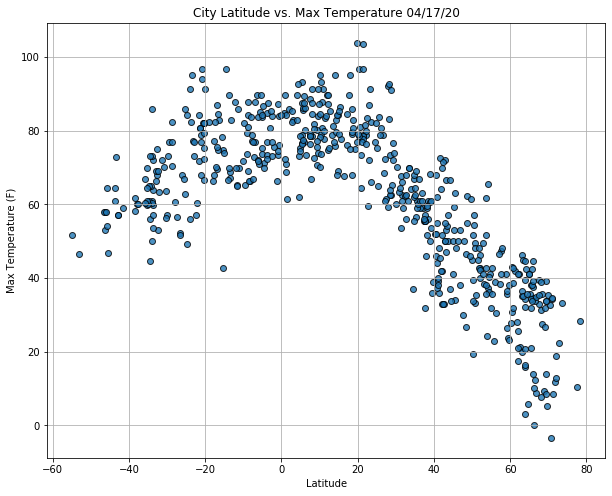

In [15]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.subplots(figsize=(10,8))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

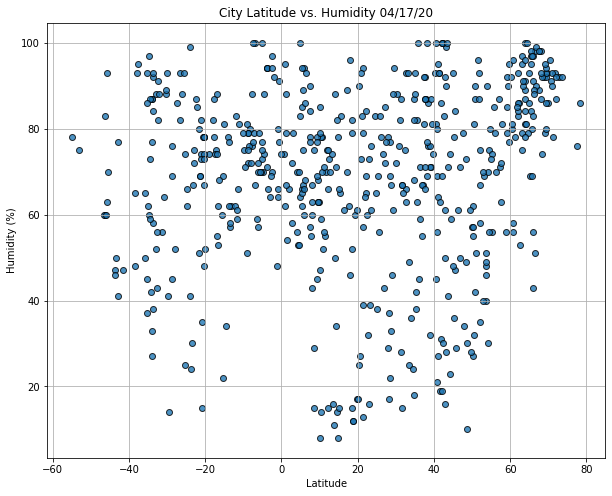

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.subplots(figsize=(10,8))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


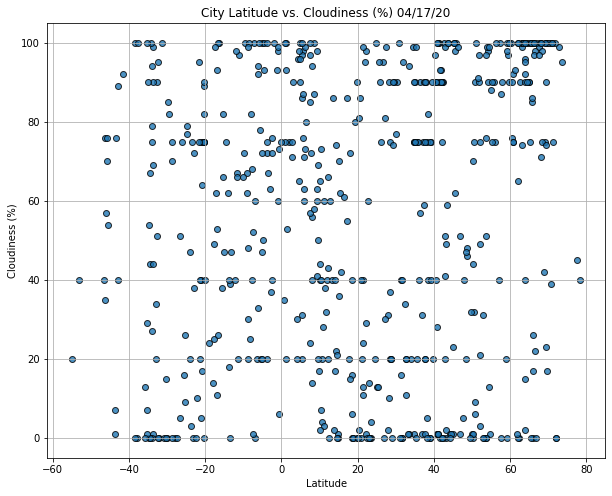

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.subplots(figsize=(10,8))
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

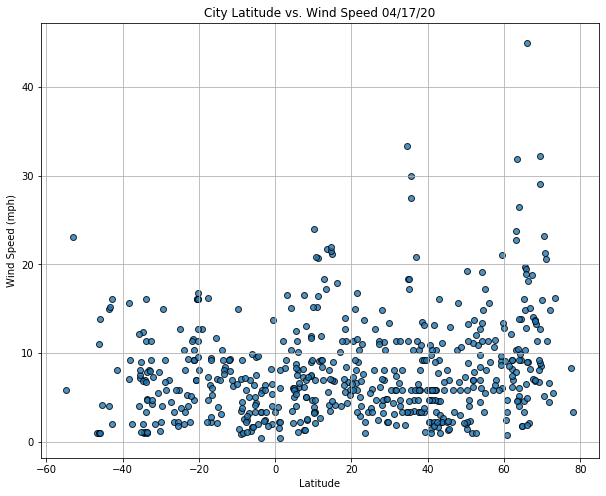

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.subplots(figsize=(10,8))
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
city_data_df.loc[(city_data_df["Lat"]>=0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mogadishu,SO,2020-04-18 05:19:05,2.04,45.34,86.00,66,75,11.41
1,Husavik,IS,2020-04-18 05:19:06,66.04,-17.34,44.60,56,0,44.96
2,Longyearbyen,SJ,2020-04-18 05:18:47,78.22,15.64,28.40,86,40,3.36
3,Ponta Do Sol,PT,2020-04-18 05:18:45,32.67,-17.10,55.99,66,11,4.00
5,Jamestown,US,2020-04-18 05:14:30,42.10,-79.24,33.01,100,90,3.36
...,...,...,...,...,...,...,...,...,...
561,Pedasi,PA,2020-04-18 05:20:58,7.53,-80.03,78.55,77,24,16.55
562,Lixourion,GR,2020-04-18 05:21:25,38.20,20.43,59.50,69,0,10.94
564,Ulloa,CO,2020-04-18 05:21:26,4.70,-75.74,61.97,53,65,2.08
566,Zhangjiakou,CN,2020-04-18 05:21:26,40.81,114.88,61.99,21,100,9.75


In [68]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
    print(f'"r_value" is {r_value}, "p_value" is {p_value}, "std_err" is {std_err}')

In [69]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

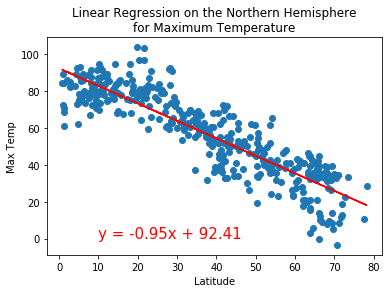

"r_value" is -0.8859495261487539, "p_value" is 3.2960561197636094e-133, "std_err" is 0.025070219841778735


In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,0))

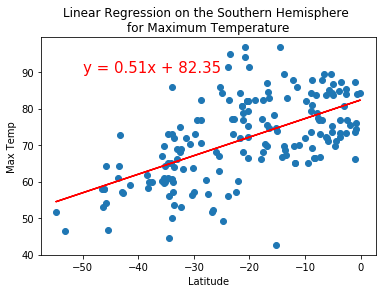

"r_value" is 0.5897046523242073, "p_value" is 7.241503992633653e-18, "std_err" is 0.05275628252640111


In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

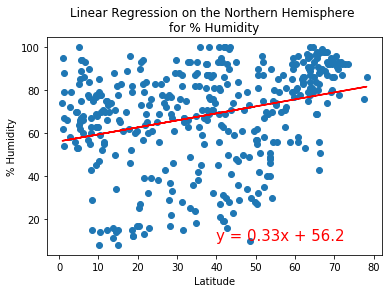

"r_value" is 0.29794534136445294, "p_value" is 1.5362621165548018e-09, "std_err" is 0.052630953539220406


In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

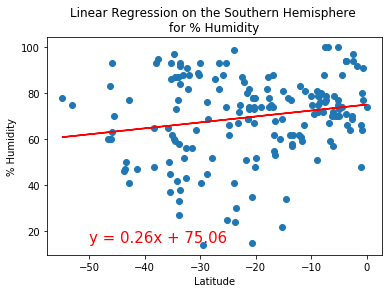

"r_value" is 0.18927084996191174, "p_value" is 0.011874502549472627, "std_err" is 0.1017327434153957


In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

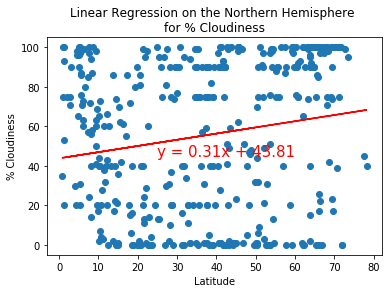

"r_value" is 0.17518941056985057, "p_value" is 0.0004689812353732437, "std_err" is 0.08870335902995899


In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(25,45))

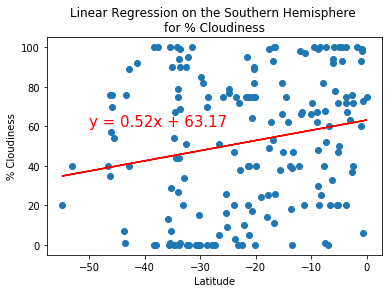

"r_value" is 0.20143501263563438, "p_value" is 0.0073439373341383, "std_err" is 0.19036847377634264


In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

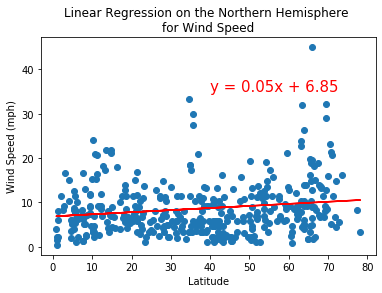

"r_value" is 0.16424673252154168, "p_value" is 0.0010518753827419318, "std_err" is 0.014275837493358841


In [81]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(40,35))

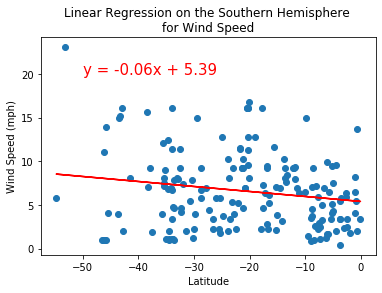

"r_value" is -0.175178513546193, "p_value" is 0.02004752275916118, "std_err" is 0.024342215862610914


In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(-50,20))